In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('data/train_V2.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [5]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


# The Killers

In [6]:
print("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever record is {}"
     .format(train['kills'].mean() , train['kills'].quantile(0.99) , train['kills'].max()))

The average person kills 0.9248 players, 99% of people have 7.0 kills or less, while the most kills ever record is 72


In [7]:
# 四分位數 quantile():https://blog.csdn.net/u011327333/article/details/71263081

Let's plot the kill counts.

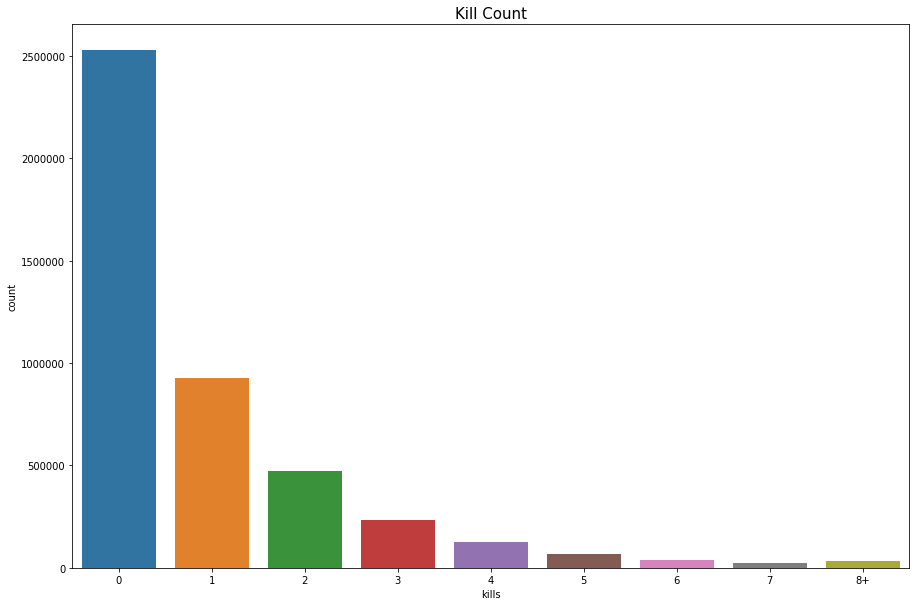

In [8]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize = (15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize = 15)
plt.show()

In [9]:
# loc 中條件用法：https://blog.csdn.net/brucewong0516/article/details/82494090

Most people can't make a single kill. At least do they do damage?

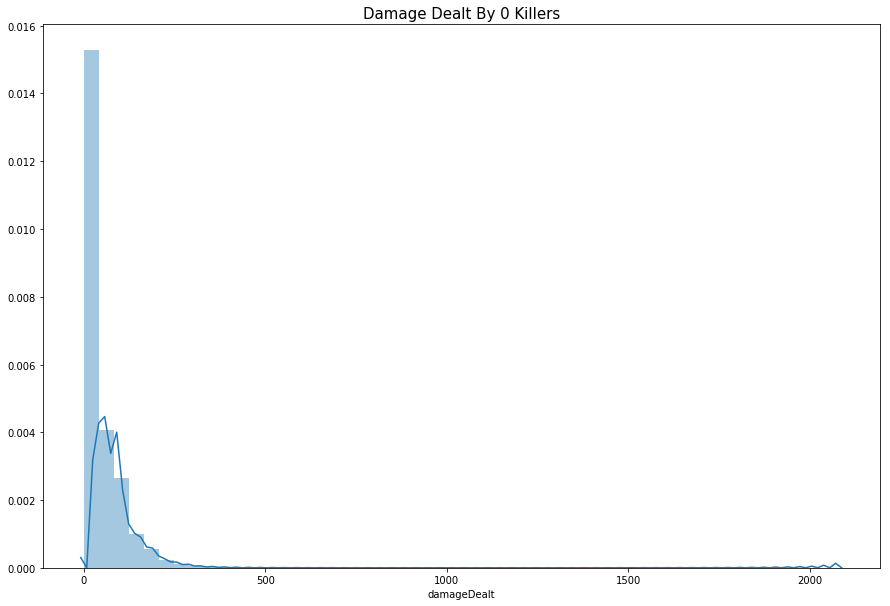

In [10]:
data = train.copy()
data = data[data['kills']==0]
plt.figure(figsize = (15,10))
plt.title("Damage Dealt By 0 Killers",fontsize = 15)
sns.distplot(data['damageDealt'])
plt.show()

In [11]:
# seaborn : distplot() https://zhuanlan.zhihu.com/p/33977558

Well, most of them don't. Let's investigate the exceptions.

In [12]:
print("{} players ({:.4f} %) have won without a single kill!".format(len(data[data['winPlacePerc'] == 1]) , 100 * len(data[data['winPlacePerc'] == 1]) / len(train)))

data1 = train[train['damageDealt'] == 0].copy()
print("{} playters ({:.4f} %) have won without dealing damage".format(len(data1[data1['winPlacePerc'] == 1]) , 100*len(data1[data1['winPlacePerc'] == 1]) / len(train)))

16666 players (0.3748 %) have won without a single kill!
4770 playters (0.1073 %) have won without dealing damage


Plot win placement percentage vs kills.
#兩變量之間的分布:jointplot https://zhuanlan.zhihu.com/p/27570774

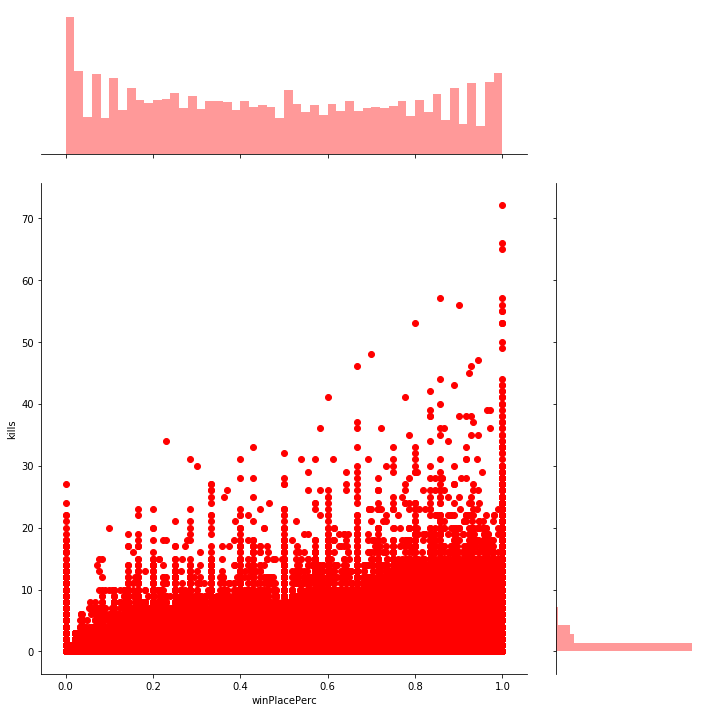

In [13]:
sns.jointplot(x = "winPlacePerc" , y = "kills" , data = train, height = 10,ratio = 3 ,color = 'r')
plt.show()

Apparentrly killing has a correlation with winning.

Finally let's group players based on kills (0 kills, 1-2 kills, 3-5 kills, 6-10 kills and 10+ kills).

#pd.cut : https://medium.com/@morris_tai/pandas%E7%9A%84cut-qcut%E5%87%BD%E6%95%B8-93c244e34cfc

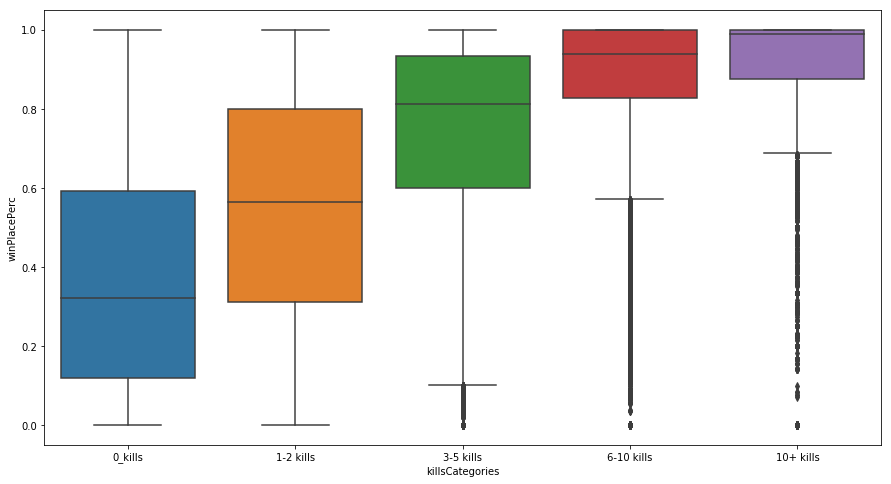

In [14]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'],[-1, 0, 2, 5, 10, 60] , labels = ['0_kills','1-2 kills','3-5 kills', '6-10 kills', '10+ kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x = 'killsCategories', y='winPlacePerc',data=kills)
plt.show()

# The Runners

In [16]:
print("The average person walks for {:.1f}m, 99% of people have walked {}m or less, while the marathoner champion walked for {}m"
     .format(train['walkDistance'].mean(),train['walkDistance'].quantile(0.99),train['walkDistance'].max()))

The average person walks for 1154.2m, 99% of people have walked 4396.0m or less, while the marathoner champion walked for 25780.0m


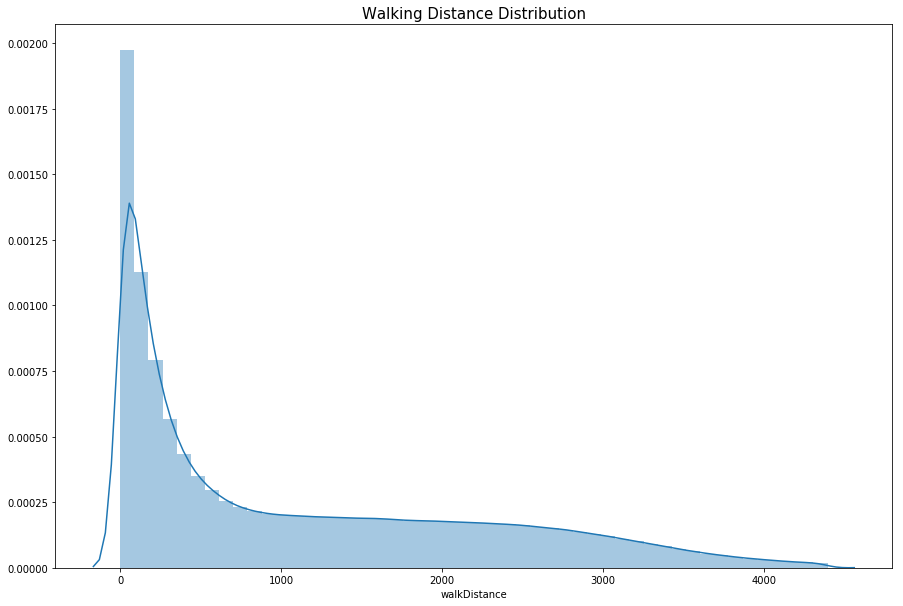

In [17]:
data = train.copy()
data = data[data['walkDistance'] < data['walkDistance'].quantile(0.99)]
plt.figure(figsize = (15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

In [18]:
print("{} players ({:.4f}%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible)."
     .format(len(data[data['walkDistance'] == 0]), 100 * len(data[data['walkDistance'] == 0]) / len(train)))

99603 players (2.2398%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).


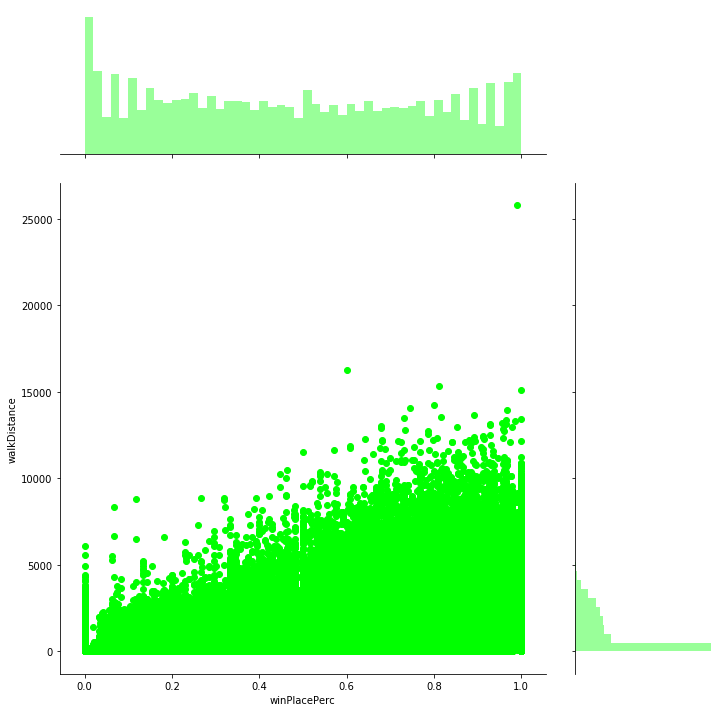

In [20]:
sns.jointplot(x = 'winPlacePerc' , y ='walkDistance',data = train , height = 10 , ratio = 3 , color ='lime')
plt.show()

Apparently walking has a high correlation with winPlacePerc.

# The Drivers

In [21]:
print("The average person drives for {:.1f}m, 99% of people have drived {}m or less, while the formula 1 champion drived for {}m."
     .format(train['rideDistance'].mean() , train['rideDistance'].quantile(0.99), train['rideDistance'].max()))

The average person drives for 606.1m, 99% of people have drived 6966.0m or less, while the formula 1 champion drived for 40710.0m.


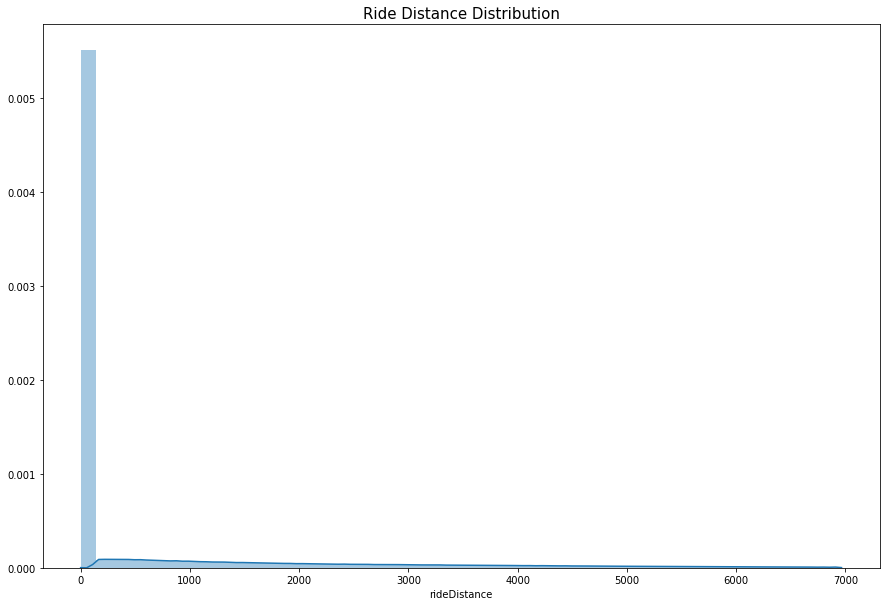

In [22]:
data = train.copy()
data = data[data['rideDistance'] < data['rideDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution",fontsize = 15)
sns.distplot(data['rideDistance'])
plt.show()

In [23]:
print("{} players ({:.4f}%) drived for 0 meters. This means that they don't have a driving licence yet."
     .format(len(data[data['rideDistance'] == 0]), 100 * len(data[data['rideDistance'] == 0]) / len(train)))

3309429 players (74.4199%) drived for 0 meters. This means that they don't have a driving licence yet.


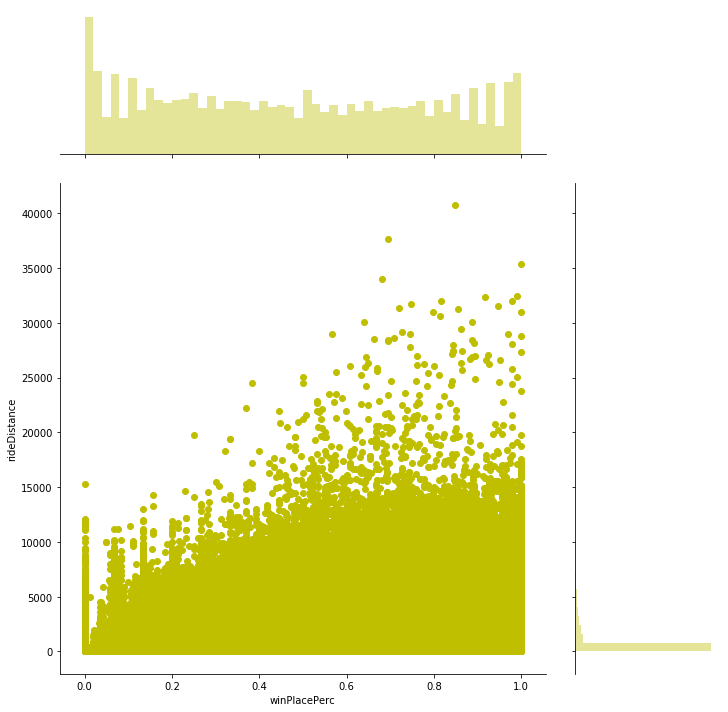

In [24]:
sns.jointplot(x = 'winPlacePerc',y='rideDistance',data=train,height=10,ratio=3,color='y')
plt.show()

Destroying a vehicle in my experience shows that a player has skills. Let's check it.

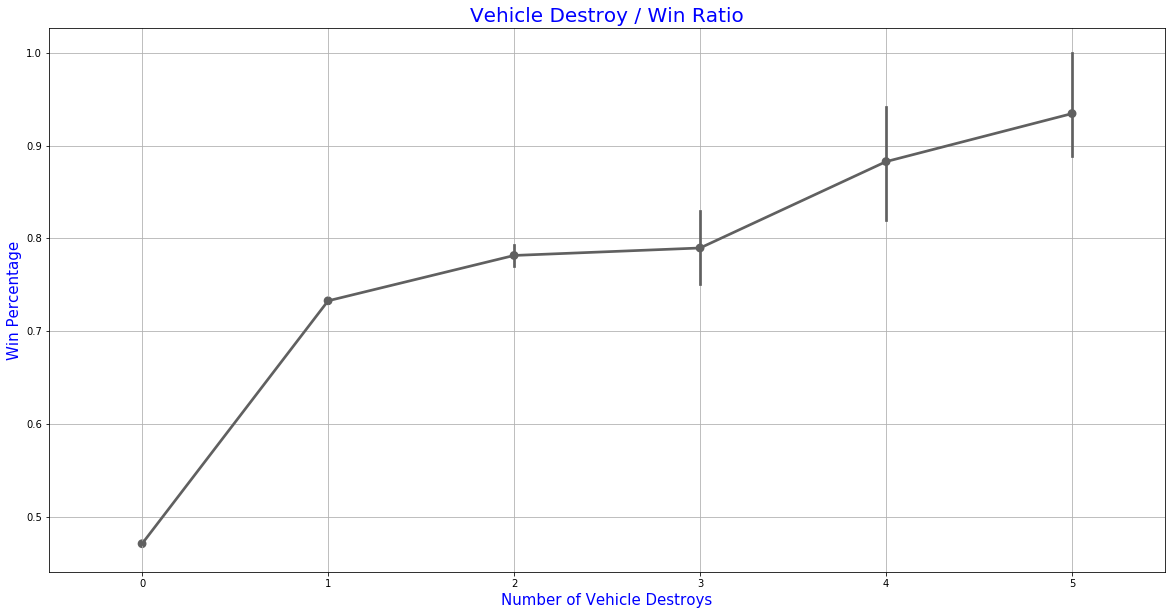

In [27]:
plt.figure(figsize=(20,10))
sns.pointplot(x = 'vehicleDestroys',y='winPlacePerc',data=train,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize=15,color='blue')
plt.ylabel('Win Percentage',fontsize=15,color='blue')
plt.title("Vehicle Destroy / Win Ratio",fontsize = 20, color='blue')
plt.grid()
plt.show()

# The Swimmers

In [28]:
print("The average person swims for {:.1f}m, 99% of people have swimemd {}m or less, while the olympic champion swimmed for {}m."
     .format(train['swimDistance'].mean(), train['swimDistance'].quantile(0.99), train['swimDistance'].max()))

The average person swims for 4.5m, 99% of people have swimemd 123.0m or less, while the olympic champion swimmed for 3823.0m.


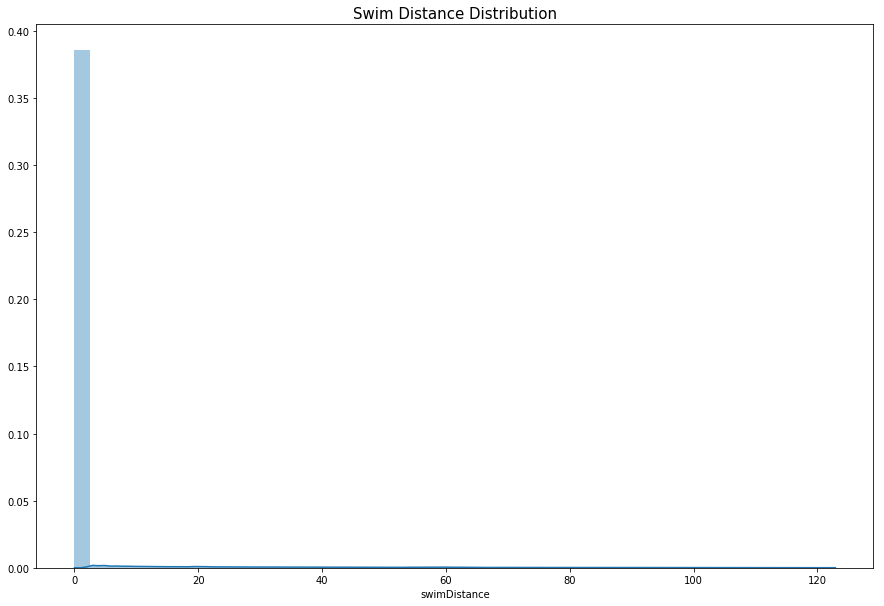

In [31]:
data = train.copy()
data = data[data['swimDistance'] < data['swimDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Swim Distance Distribution",fontsize=15)
sns.distplot(data['swimDistance'])
plt.show()

Almost no one swims. Let's group the swimming distances in 4 categories and plot vs winPlacePerc.

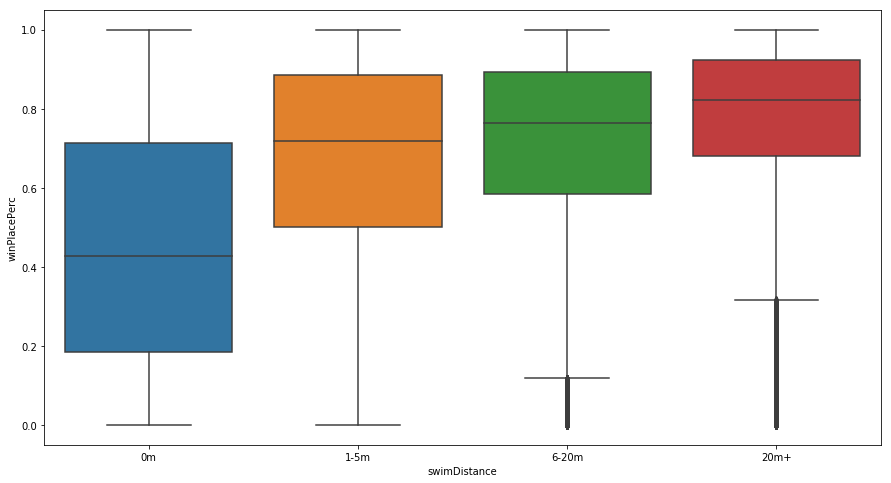

4157694,33326,65486,190460


In [34]:
swim = train.copy()
swim['swimDistance'] = pd.cut(swim['swimDistance'],[-1,0,5,20,3823],labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x='swimDistance',y='winPlacePerc',data=swim)
plt.show()

print("{},{},{},{}".format(len(swim[swim['swimDistance'] == '0m']),len(swim[swim['swimDistance'] == '1-5m']),len(swim[swim['swimDistance'] == '6-20m']),len(swim[swim['swimDistance'] == '20m+'])))

# The Healers

In [35]:
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}."
     .format(train['heals'].mean(),train['heals'].quantile(0.99),train['heals'].max()))
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}."
     .format(train['boosts'].mean(),train['boosts'].quantile(0.99),train['boosts'].max()))

The average person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 80.
The average person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 33.


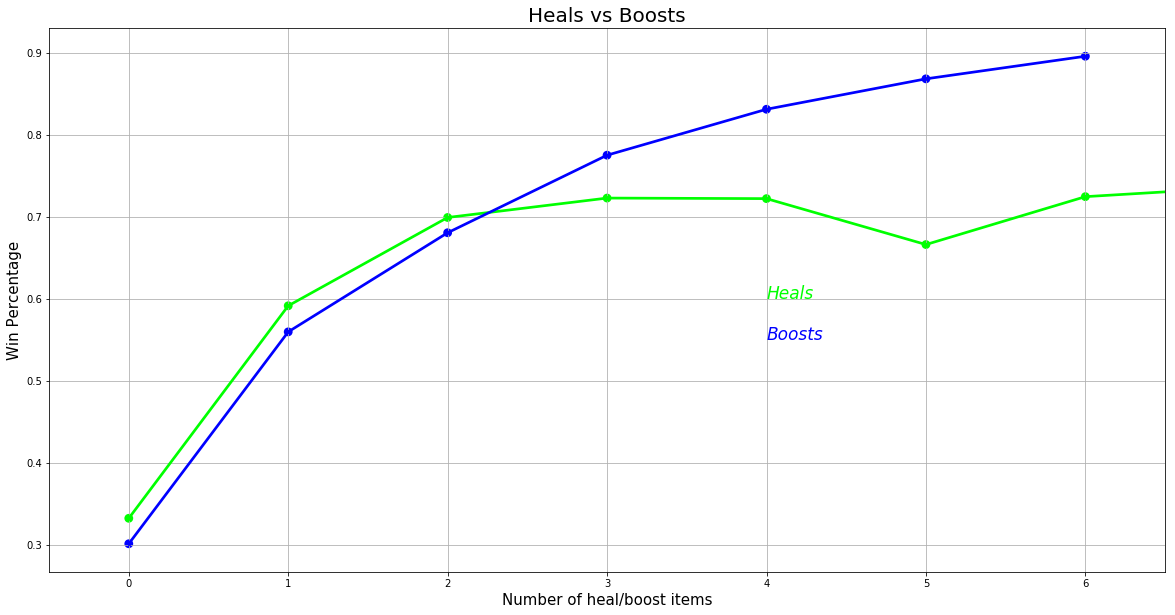

In [36]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize=(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize=17,style='italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize=17,style='italic')
plt.xlabel("Number of heal/boost items",fontsize= 15 ,color = 'black')
plt.ylabel("Win Percentage",fontsize= 15 ,color = 'black')
plt.title('Heals vs Boosts',fontsize= 20 , color = 'black')
plt.grid()
plt.show()

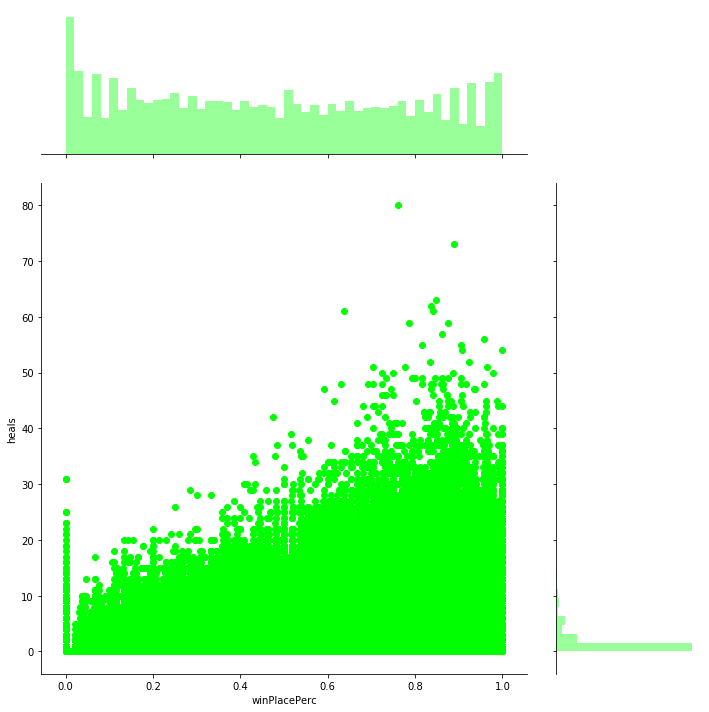

In [39]:
sns.jointplot(x='winPlacePerc',y='heals',data=train,ratio=3,height = 10,color ='lime')
plt.show()

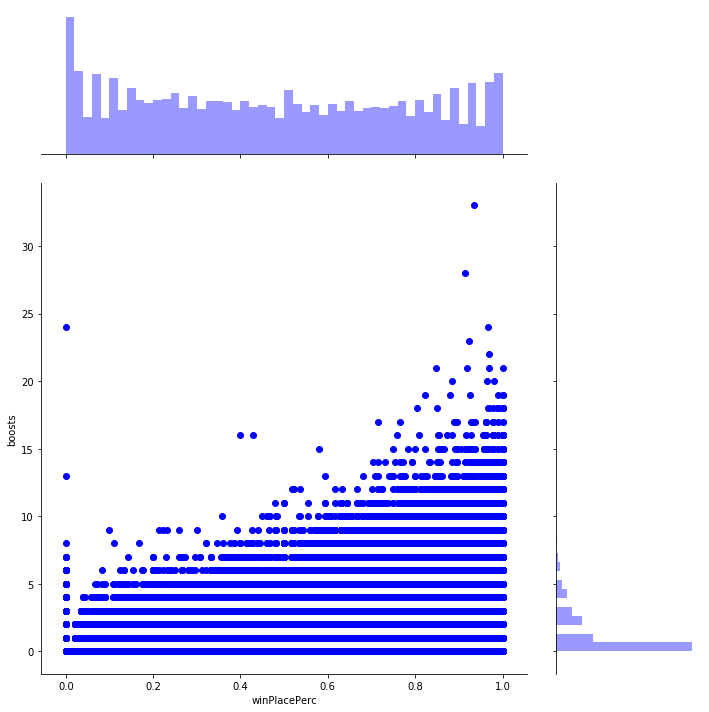

In [41]:
sns.jointplot(x='winPlacePerc',y='boosts',data=train,ratio=3,height= 10 , color ='blue')
plt.show()

So healing and boosting, definitely are correlated with winPlacePerc. Boosting is more.

In every plot, there is an abnormal behavior when values are 0.

# Solos, Duos and Squads

In [43]:
solos = train[train['numGroups'] > 50]
duos = train[(train['numGroups'] >25 )&(train['numGroups'] <= 50)]
squads = train[train['numGroups'] <= 25]
print("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games."
.format(len(solos),100*len(solos)/len(train),len(duos),100*len(duos)/len(train),len(squads),100*len(squads)/len(train)))

There are 709111 (15.95%) solo games, 3295326 (74.10%) duo games and 442529 (9.95%) squad games.


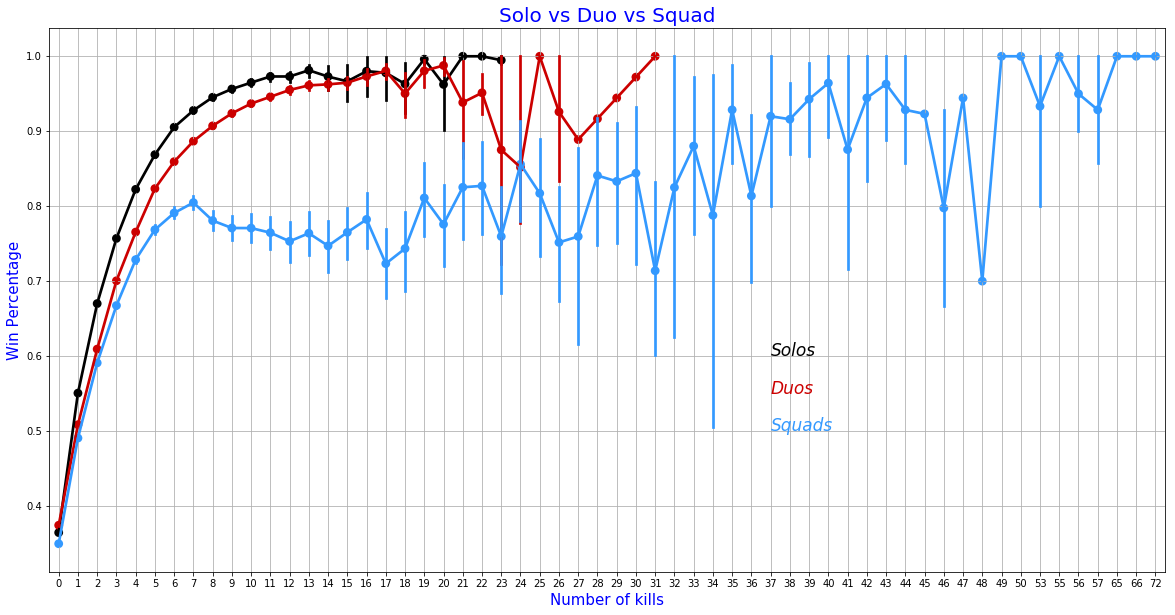

In [44]:
f,ax1 = plt.subplots(figsize=(20,10))
sns.pointplot(x='kills', y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',fontsize=17,color = 'black',style='italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',color='blue',fontsize=15)
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad',fontsize= 20,color = 'blue')
plt.grid()
plt.show()

Solos and duos behave similar, but when playing squads kills don't matter that much.

Let`s see DBNO(knocks),assists and revive 

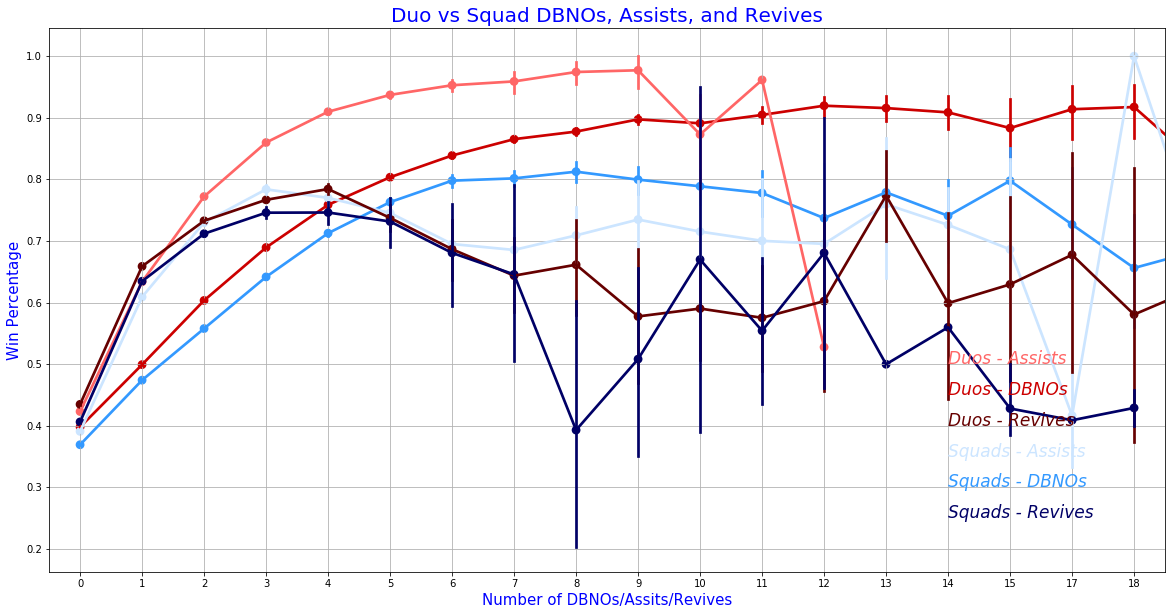

In [47]:
f,ax1 = plt.subplots(figsize=(20,10))
sns.pointplot(x='DBNOs',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='DBNOs',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=duos,color='#FF6666',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=squads,color='#CCE5FF',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=duos,color='#660000',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=squads,color='#000066',alpha=0.8)
plt.text(14,0.5,'Duos - Assists',color='#FF6666',fontsize = 17,style = 'italic')
plt.text(14,0.45,'Duos - DBNOs',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(14,0.4,'Duos - Revives',color='#660000',fontsize = 17,style = 'italic')
plt.text(14,0.35,'Squads - Assists',color='#CCE5FF',fontsize = 17,style = 'italic')
plt.text(14,0.3,'Squads - DBNOs',color='#3399FF',fontsize = 17,style = 'italic')
plt.text(14,0.25,'Squads - Revives',color='#000066',fontsize = 17,style = 'italic')
plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Duo vs Squad DBNOs, Assists, and Revives',fontsize = 20,color='blue')
plt.grid()
plt.show()

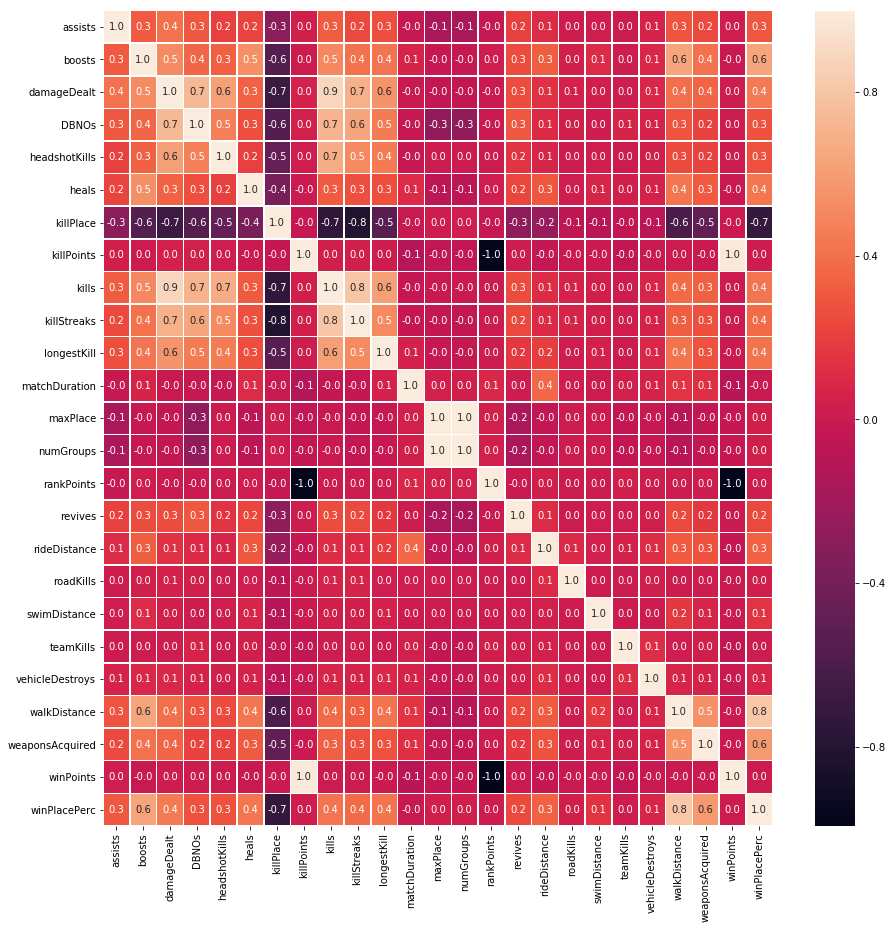

In [52]:
# heatmap : https://zhuanlan.zhihu.com/p/35494575
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(train.corr() , ax = ax ,annot = True, fmt = '.1f',linewidths = .5)
plt.show()

In terms of the target variable (winPlacePerc), there are a few variables high medium to high correlation. The highest positive correlation is walkDistance and the highest negative the killPlace.

##### Let's zoom to the top-5 most positive correlated variables with the target.

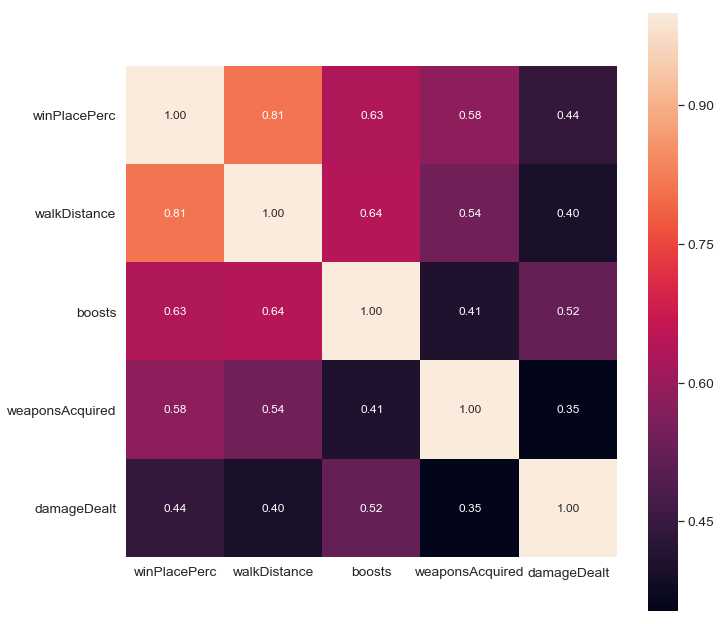

In [90]:
k = 5
f,ax = plt.subplots(figsize=(11,11))
cols = train.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = train[cols].corr()
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm , cbar = True, annot = True, square = True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [91]:
# nlargest : 取前幾大的排行 https://zhuanlan.zhihu.com/p/30402355
# corrcoef : 計算各變數的相關係數 https://www.itread01.com/content/1532854985.html
# 但使用np.corrcoef 會得到nan的值，因此使用df.corr()較好 https://www.codenong.com/31619578/

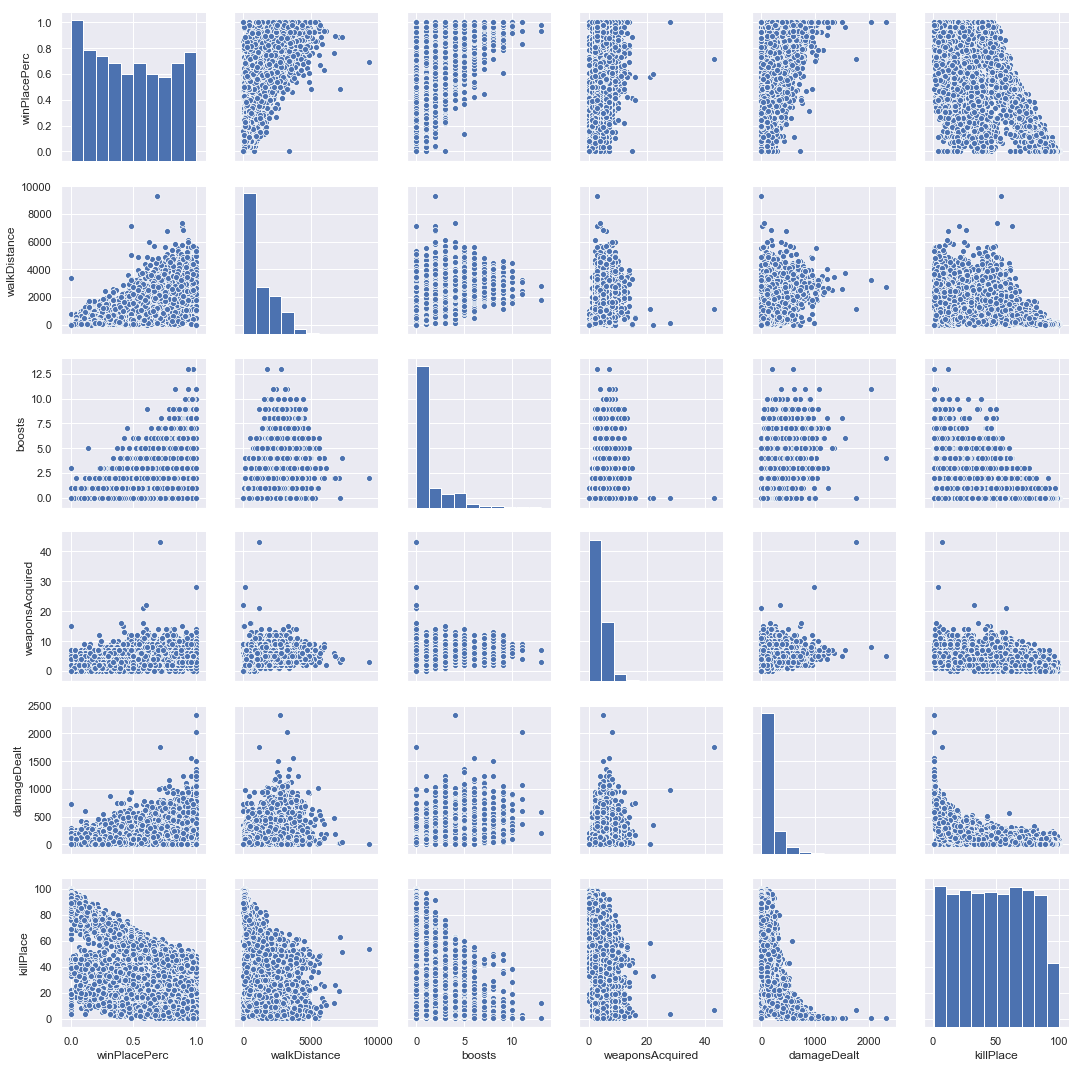

In [105]:
sns.set()
cols = ['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'killPlace']
sns.pairplot(train[cols].head(10000),size = 2.5)  #整筆資料電腦跑不動，先用10000筆看看
plt.show()

# Feature Engineering
A game in PUBG can have up to 100 players fighting each other. But most of the times a game isn't "full". There is no variable that gives us the number of players joined. So lets create one.

In [107]:
train['playerJoined'] = train.groupby('matchId')['matchId'].transform('count')

In [106]:
# groupby and transform: https://www.jianshu.com/p/509d7b97088c

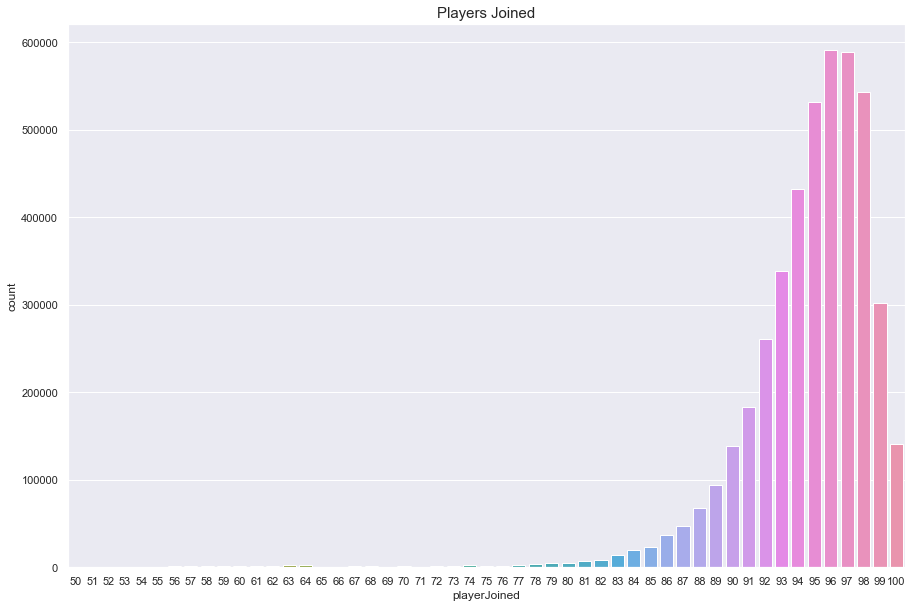

In [109]:
data = train.copy()
data = data[data['playerJoined'] > 49]
plt.figure(figsize=(15,10))
sns.countplot(data['playerJoined']) #countplot可計算次數：https://medium.com/@yanweiliu/python-%E8%B3%87%E6%96%99%E8%A6%96%E8%A6%BA%E5%8C%96%E7%AD%86%E8%A8%98-%E4%BA%8C-%E4%BD%BF%E7%94%A8seaborn%E7%B9%AA%E5%9C%96-3adb03407a9
plt.title("Players Joined",fontsize=15)
plt.show()

Based on the "playersJoined" feature we can create (or change) a lot of others to normalize their values. For example i will create the "killsNorm" and "damageDealtNorm" features. When there are 100 players in the game it might be easier to find and kill someone, than when there are 90 players. So i will normalize the kills in a way that a kill in 100 players will score 1 (as it is) and in 90 players it will score (100-90)/100 + 1 = 1.1. This is just an assumption. You can use different scales.

In [112]:
train['killsNorm'] = train['kills'] * ((100-train['playerJoined']) / 100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playerJoined'])/100 + 1)
train[['playerJoined', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm']][5:8]

,playerJoined,kills,killsNorm,damageDealt,damageDealtNorm
5,95,1,1.05,100.000,105.00000
6,97,0,0.00,0.000,0.00000
7,96,0,0.00,8.538,8.87952


Another simple feature is the sum of heals and boosts. Also the sum of total distance travelled.

In [116]:
train['healsAndboosts'] = train['heals'] + train['boosts']
train['totalDistance'] = train['walkDistance'] + train['rideDistance'] + train['swimDistance']

When using boosting items you run faster. They also help staying out of the zone (PUBG term) and loot more (meaning walking more). So lets create a feature boosts per walking distance. Heals don't make you run faster, but they also help staying out of the zone and loot more. So lets create the same feature for heals also.

In [119]:
train['boostsPerWalkDistance'] = train['boosts']/(train['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where boosts>0 and walkDistance=0. Strange.
train['boostsPerWalkDistance'].fillna(0,inplace = True)

train['healsPerWalkDistance'] = train['heals']/(train['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where heals>0 and walkDistance=0. Strange.
train['healsPerWalkDistance'].fillna(0, inplace=True)

train['healsAndBoostsPerWalkDistance'] = train['healsAndboosts']/(train['walkDistance']+1) #The +1 is to avoid infinity.
train['healsAndBoostsPerWalkDistance'].fillna(0, inplace=True)

train[['walkDistance', 'boosts', 'boostsPerWalkDistance' ,'heals',  'healsPerWalkDistance', 'healsAndboosts', 'healsAndBoostsPerWalkDistance']][40:45]

,walkDistance,boosts,boostsPerWalkDistance,heals,healsPerWalkDistance,healsAndboosts,healsAndBoostsPerWalkDistance
40,327.30,1,0.003046,1,0.003046,2,0.006092
41,128.80,0,0.000000,0,0.000000,0,0.000000
42,52.52,0,0.000000,0,0.000000,0,0.000000
43,534.10,1,0.001869,0,0.000000,1,0.001869
44,2576.00,4,0.001552,6,0.002328,10,0.003880


Same, let's create the feature "killsPerWalkDistance".

In [121]:
train['killsPerWalkDistance'] = train['kills'] / (train['walkDistance'] + 1) #The +1 is to avoid infinity, because there are entries where kills>0 and walkDistance=0. Strange.
train['killsPerWalkDistance'].fillna(0 , inplace =True)
train[['kills', 'walkDistance', 'rideDistance', 'killsPerWalkDistance', 'winPlacePerc']].sort_values(by = 'killsPerWalkDistance').tail(10)

,kills,walkDistance,rideDistance,killsPerWalkDistance,winPlacePerc
4115816,29,0.0,0.0,29.0,0.7500
3083358,30,0.0,0.0,30.0,0.7500
422093,30,0.0,0.0,30.0,1.0000
2394021,31,0.0,0.0,31.0,0.5385
3057746,31,0.0,0.0,31.0,0.7500
2998470,35,0.0,0.0,35.0,1.0000
1158891,36,0.0,0.0,36.0,0.5833
3062788,36,0.0,0.0,36.0,0.8667
1068513,38,0.0,0.0,38.0,0.8333
1702541,43,0.0,0.0,43.0,1.0000


0 walking distance and many kills? Also most have winPlacePerc=1. Definitelly cheaters.

Earlier in the kernel we did EDA for Solos, Duos and Squads. Lets create a column for them.

In [122]:
train['team'] = [1 if i >50 else 2 if (i>25 & i <=50) else 4 for i in train['numGroups']]

In [123]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,playerJoined,killsNorm,damageDealtNorm,healsAndboosts,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,healsAndBoostsPerWalkDistance,killsPerWalkDistance,team
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,96,0.00,0.0000,0,244.8000,0.0,0.0,0.0,0.000000,2
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,91,0.00,99.7023,0,1445.0445,0.0,0.0,0.0,0.000000,4
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,98,0.00,69.3600,0,161.8000,0.0,0.0,0.0,0.000000,2
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,91,0.00,35.8610,0,202.7000,0.0,0.0,0.0,0.000000,2
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,97,1.03,103.0000,0,49.7500,0.0,0.0,0.0,0.019704,1
